# Regression analysis
This part of our case study on ER time optimisation will be on measuring the affecting
factors on the waitng time and patient outcome. Starting by importing libararies and loading our dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices
import statsmodels.discrete.discrete_model as smd
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv("clean_ER_data.csv")

In [4]:
x = pd.get_dummies(df[['urgency_level', 'day_of_week', 'month', 'season','region', 'hospital_name', 'time', ]], drop_first =True)

In [6]:
# Select only numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=np.number)
correlations = numeric_df.corr()['total_wait_time'].sort_values(ascending=False)

# Add 'total_wait_time' to the dummy variables DataFrame
x['total_wait_time'] = df['total_wait_time']
catigorical_correlations = x.corr()['total_wait_time']
print(correlations)
print(catigorical_correlations)

total_wait_time                 1.000000
time_of_medical_professional    0.976446
time_to_triage                  0.953604
time_of_registration            0.924238
nurse_to_patient_ratio          0.688015
patient_count_y                 0.040828
patient_count                   0.040828
patient_number                  0.040828
specialist_availability         0.006579
facility_size                  -0.003578
patient_satisfaction           -0.865145
patient_count_x                      NaN
Name: total_wait_time, dtype: float64
urgency_level_High     -0.327579
urgency_level_Low       0.765404
urgency_level_Medium    0.102079
day_of_week_Monday      0.123033
day_of_week_Saturday   -0.058017
                          ...   
time_9:56:00           -0.001170
time_9:57:00           -0.000690
time_9:58:00            0.010228
time_9:59:00            0.016026
total_wait_time         1.000000
Name: total_wait_time, Length: 1427, dtype: float64


In [7]:
corelation_matrix = df[['nurse_to_patient_ratio', 'specialist_availability', 'total_wait_time', 'time_to_triage', 'time_of_medical_professional', 'time_of_registration', 'patient_number']].corr()
print(corelation_matrix)

                              nurse_to_patient_ratio  specialist_availability  \
nurse_to_patient_ratio                      1.000000                 0.002511   
specialist_availability                     0.002511                 1.000000   
total_wait_time                             0.688015                 0.006579   
time_to_triage                              0.646690                -0.000512   
time_of_medical_professional                0.673622                 0.011028   
time_of_registration                        0.652054                 0.006500   
patient_number                              0.019587                -0.007894   

                              total_wait_time  time_to_triage  \
nurse_to_patient_ratio               0.688015        0.646690   
specialist_availability              0.006579       -0.000512   
total_wait_time                      1.000000        0.953604   
time_to_triage                       0.953604        1.000000   
time_of_medical_profession

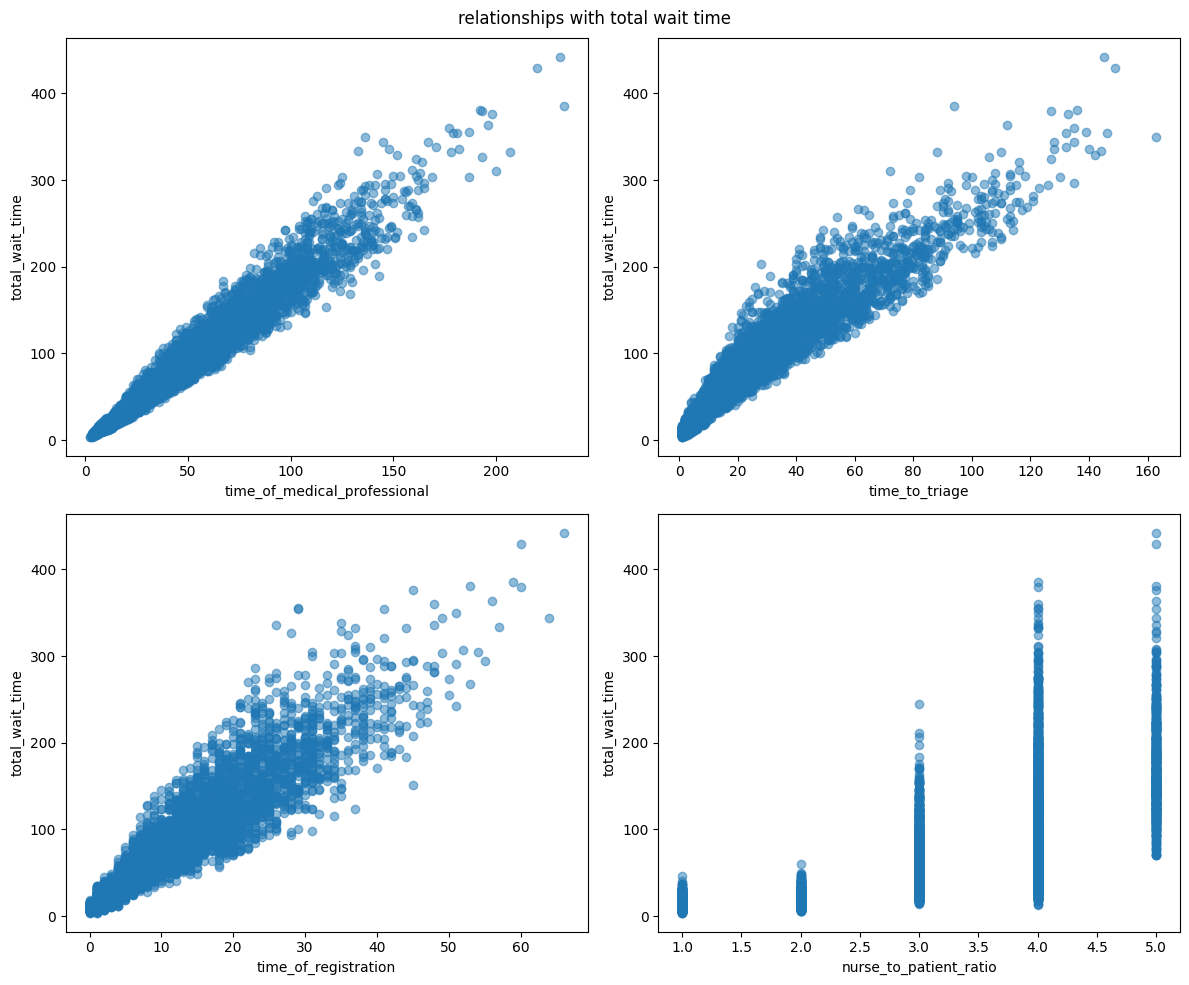

In [8]:
fig, axis = plt.subplots(2,2, figsize=(12,10))
fig.suptitle('relationships with total wait time')


factors = df[['time_of_medical_professional', 'time_to_triage', 'time_of_registration', 'nurse_to_patient_ratio','urgency_level', 'day_of_week', 'month', 'season','region', 'hospital_name', 'patient_number']]
wait_time = df['total_wait_time']

for i, column in enumerate(factors.columns[:4]):
  row, col = i // 2 , i % 2
  axis[row, col].scatter(factors[column], wait_time, alpha = 0.5)
  axis[row, col].set_xlabel(column)
  axis[row, col].set_ylabel('total_wait_time')
plt.tight_layout()
plt.show()

In [9]:
# Select only numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=np.number)
correlations = numeric_df.corr()['total_wait_time'].sort_values(ascending=False)

# Add 'total_wait_time' to the dummy variables DataFrame
x['total_wait_time'] = df['total_wait_time']
catigorical_correlations = x.corr()['total_wait_time']
print(correlations)
print(catigorical_correlations)

KeyboardInterrupt: 

In [11]:
factors = df[[ 'nurse_to_patient_ratio','urgency_level', 'day_of_week', 'month', 'season','region', 'hospital_name', 'time', 'date', 'patient_number']]
log_wait_time = np.log(df['total_wait_time'])
X_train, X_test, Y_train,Y_test = train_test_split(factors, log_wait_time, test_size=0.3)

ols_data = pd.concat([X_train, Y_train], axis=1)
ols_formula =  ' total_wait_time ~ nurse_to_patient_ratio + patient_number + C(urgency_level) + C(day_of_week) + C(season) + C(urgency_level) + C(region) + C(hospital_name) + C(date) + C(time) '
OLS = ols(formula= ols_formula, data= ols_data)
model = OLS.fit()

model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        total_wait_time   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     21.04
Date:                Sun, 19 Oct 2025   Prob (F-statistic):               0.00
Time:                        21:07:20   Log-Likelihood:                 577.87
No. Observations:                3500   AIC:                             2220.
Df Residuals:                    1812   BIC:                         1.262e+04
Df Model:                        1687                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            2.5647      0.296      8.670      0.000       1.984       3.145
C(urgency_level)[T.High]                             0.5640      0.033     17.330      0.000       0.500       0.628
C(urgency_level)[T.Low]                              1.8239      0.044     41.743      0.000       1.738       1.910
C(urgency_level)[T.Medium]                           1.3420      0.033     41.086      0.000       1.278       1.406
C(day_of_week)[T.Monday]                             0.2812      0.103      2.741      0.006       0.080       0.482
C(day_of_week)[T.Saturday]                          -0.1608      0.023     -6.847      0.000      -0.207      -0.115
C(day_of_week)[T.Sunday]                            -0.2744      0.023    -11.704      0.000      -0.320      -0.228
C(day_of_week)[T.Thursday]                          -0.0673      0.026     -2.636      0.008      -0.117      -0.017
C(day_of_week)[T.Tuesday]                           -0.0825      0.024     -3.500      0.000      -0.129      -0.036
C(day_of_week)[T.Wednesday]                         -0.0679      0.024     -2.794      0.005      -0.115      -0.020
C(season)[T.Spring]                                  0.1076      0.019      5.652      0.000       0.070       0.145
C(season)[T.Summer]                                  0.3178      0.018     17.290      0.000       0.282       0.354
C(season)[T.Winter]                                  0.5105      0.061      8.383      0.000       0.391       0.630
C(region)[T.Urban]                                  -0.0011      0.013     -0.083      0.934      -0.027       0.025
C(hospital_name)[T.Riverside Medical Center]         0.0039      0.013      0.311      0.756      -0.021       0.029
C(hospital_name)[T.Springfield General Hospital]    -0.0077      0.013     -0.591      0.555      -0.033       0.018
C(hospital_name)[T.St. Mary’s Regional Health]      -0.0412      0.021     -1.943      0.052      -0.083       0.000
C(hospital_name)[T.Summit Health Center]             0.0026      0.013      0.206      0.837      -0.023       0.028
C(date)[T.1/10/2024]                                 0.0350      0.217      0.161      0.872      -0.391       0.461
C(date)[T.1/11/2024]                                -0.0411      0.143     -0.287      0.774      -0.322       0.240
C(date)[T.1/12/2024]                                -0.1316      0.127     -1.036      0.300      -0.381       0.118
C(date)[T.1/13/2024]                                -0.2820      0.151     -1.868      0.062      -0.578       0.014
C(date)[T.1/14/2024]                                 0.0722      0.092      0.784      0.433      -0.108       0.253
C(date)[T.1/15/2024]                     

### residual analysis

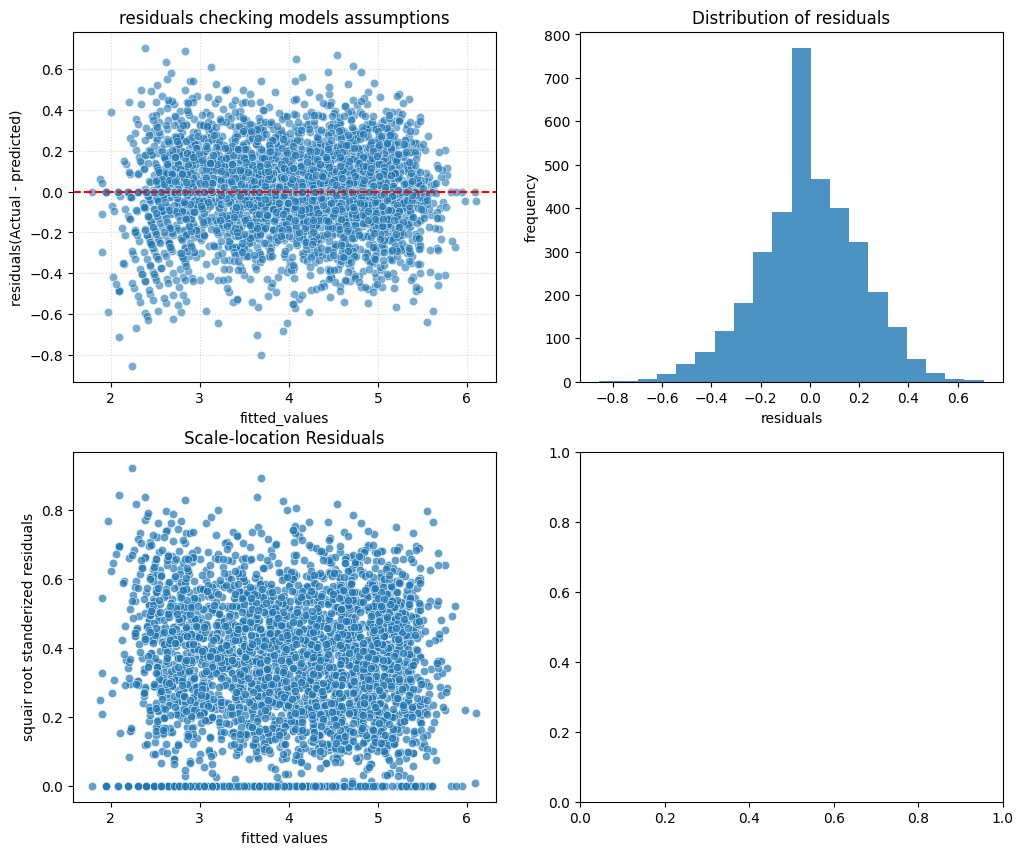

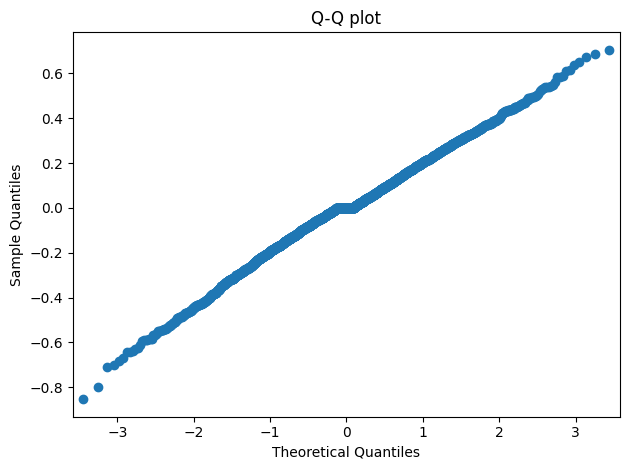

In [12]:
residuals = model.resid
fitted = model.fittedvalues
fitted.dtype
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.scatterplot(x=fitted,y=residuals, alpha= 0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('fitted_values')
plt.ylabel('residuals(Actual - predicted)')
plt.title('residuals checking models assumptions')
plt.grid(True , linestyle=":", alpha =0.5)

plt.subplot(2,2,2)
plt.hist(residuals, bins=20, alpha=0.8)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('Distribution of residuals')

plt.subplot(2,2,3)
sns.scatterplot(x=fitted, y=np.sqrt(np.abs(residuals)), alpha= 0.7)
plt.xlabel('fitted values')
plt.ylabel('squair root standerized residuals')
plt.title('Scale-location Residuals')

plt.subplot(2,2,4)
sm.qqplot(residuals)
plt.title('Q-Q plot')

plt.tight_layout()
plt.show()

In [10]:
df['patient_satisfaction'] = df['patient_satisfaction'].astype("category")
factors = df[[ 'nurse_to_patient_ratio','urgency_level', 'day_of_week', 'month', 'season','region', 'hospital_name', 'time', 'date', 'total_wait_time', 'patient_number']]
patient_satisfaction = df['patient_satisfaction']
X_train, X_test, Y_train,Y_test = train_test_split(factors,patient_satisfaction , test_size=0.3, random_state= 42)

ols_data = pd.concat([X_train, Y_train], axis=1)
mnl_formula =  ' patient_satisfaction ~ nurse_to_patient_ratio + patient_number+ total_wait_time + C(urgency_level) + C(day_of_week) + C(season) + C(urgency_level) + C(region) + C(hospital_name) + C(date) + C(time)  '

X,Y = dmatrices(mnl_formula, data=ols_data, return_type='dataframe')
mnl_model = smd.MNLogit(Y, X)
results = mnl_model.fit()
mnl_model.summary()







KeyboardInterrupt: 

In [ ]:
factors = df[[ 'nurse_to_patient_ratio','urgency_level', 'day_of_week', 'month', 'season','region', 'hospital_name', 'time', 'date', 'total_wait_time', 'patient_number']]
patient_satisfaction = df['patient_satisfaction']
X_train, X_test, Y_train,Y_test = train_test_split(factors,patient_satisfaction , test_size=0.3, random_state= 42)

ols_data = pd.concat([X_train, Y_train], axis=1)
ols_formula =  ' patient_satisfaction ~ nurse_to_patient_ratio +patient_number+ total_wait_time + C(urgency_level) + C(day_of_week) + C(season) + C(urgency_level) + C(region) + C(hospital_name) + C(date) + C(time)  '
OLS = ols(formula= ols_formula, data= ols_data)
satisfaction_model = OLS.fit()

satisfaction_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     patient_satisfaction   R-squared:                       0.926
Model:                              OLS   Adj. R-squared:                  0.858
Method:                   Least Squares   F-statistic:                     13.50
Date:                  Sun, 19 Oct 2025   Prob (F-statistic):               0.00
Time:                          21:11:01   Log-Likelihood:                -1634.8
No. Observations:                  3500   AIC:                             6646.
Df Residuals:                      1812   BIC:                         1.704e+04
Df Model:                          1687                                         
Covariance Type:              nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            5.3707      0.414     12.982      0.000       4.559       6.182
C(urgency_level)[T.High]                            -0.3332      0.061     -5.475      0.000      -0.453      -0.214
C(urgency_level)[T.Low]                             -1.7520      0.102    -17.245      0.000      -1.951      -1.553
C(urgency_level)[T.Medium]                          -1.4872      0.066    -22.418      0.000      -1.617      -1.357
C(day_of_week)[T.Monday]                             0.1294      0.141      0.917      0.359      -0.147       0.406
C(day_of_week)[T.Saturday]                           0.1741      0.045      3.857      0.000       0.086       0.263
C(day_of_week)[T.Sunday]                             0.2417      0.045      5.328      0.000       0.153       0.331
C(day_of_week)[T.Thursday]                           0.1502      0.045      3.330      0.001       0.062       0.239
C(day_of_week)[T.Tuesday]                            0.1153      0.045      2.582      0.010       0.028       0.203
C(day_of_week)[T.Wednesday]                          0.1970      0.045      4.349      0.000       0.108       0.286
C(season)[T.Spring]                                  0.0082      0.035      0.233      0.816      -0.061       0.077
C(season)[T.Summer]                                 -0.1374      0.035     -3.884      0.000      -0.207      -0.068
C(season)[T.Winter]                                 -0.1436      0.087     -1.646      0.100      -0.315       0.027
C(region)[T.Urban]                                  -0.0058      0.024     -0.239      0.811      -0.053       0.042
C(hospital_name)[T.Riverside Medical Center]         0.0109      0.024      0.454      0.650      -0.036       0.058
C(hospital_name)[T.Springfield General Hospital]    -0.0001      0.025     -0.006      0.995      -0.048       0.048
C(hospital_name)[T.St. Mary’s Regional Health]       0.0779      0.040      1.955      0.051      -0.000       0.156
C(hospital_name)[T.Summit Health Center]            -0.0165      0.024     -0.678      0.498      -0.064       0.031
C(date)[T.1/10/2024]                                -0.0415      0.269     -0.154      0.878      -0.569       0.486
C(date)[T.1/11/2024]                                -0.3550      0.259     -1.372      0.170      -0.863       0.153
C(date)[T.1/12/2024]                                 0.0966      0.266      0.362      0.717      -0.426       0.619
C(date)[T.1/13/2024]                                 0.2445      0.272      0.899      0.369      -0.289       0.778
C(date)[T.1/14/2024]                                -0.3102      0.211     -1.473      0.141      -0.723       0.103
C(date)[T.1/15/2024

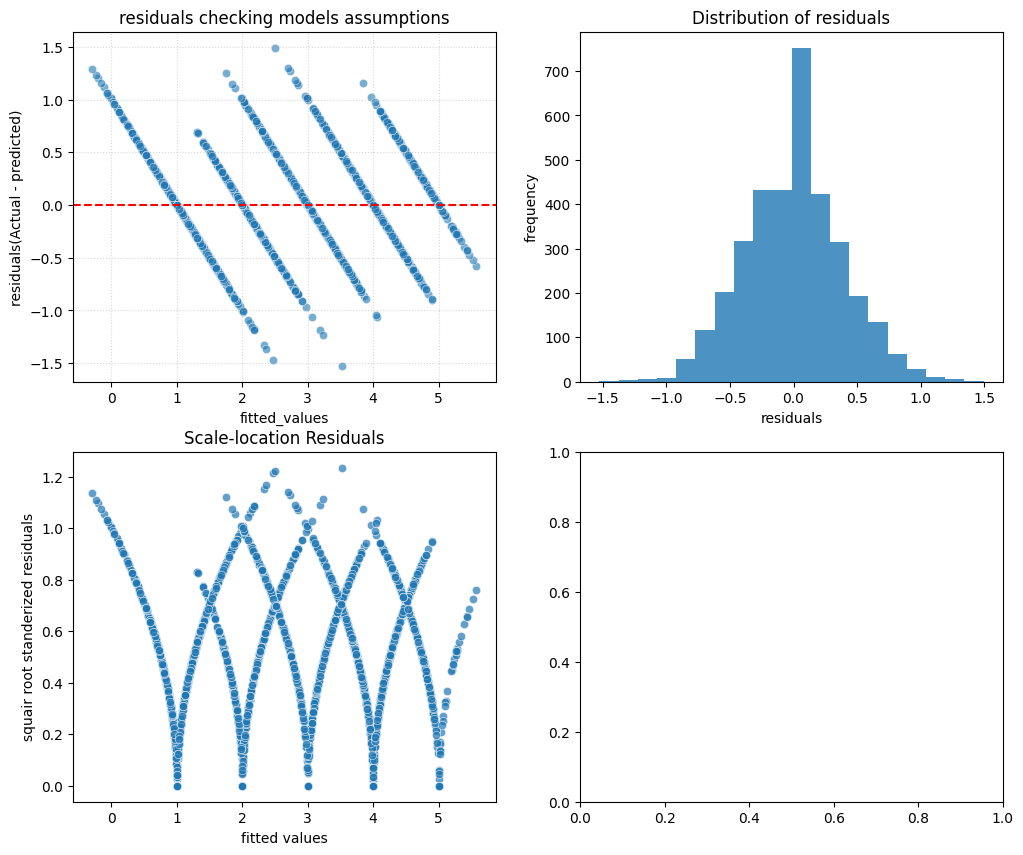

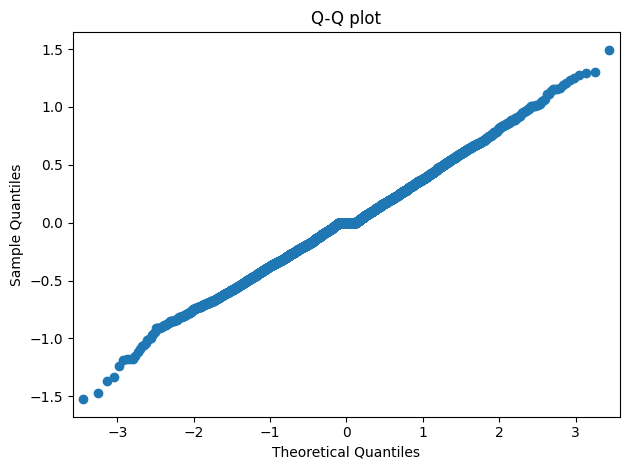

In [ ]:
residuals = satisfaction_model.resid
fitted = satisfaction_model.fittedvalues

plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.scatterplot(x=fitted,y=residuals, alpha= 0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('fitted_values')
plt.ylabel('residuals(Actual - predicted)')
plt.title('residuals checking models assumptions')
plt.grid(True , linestyle=":", alpha =0.5)

plt.subplot(2,2,2)
plt.hist(residuals, bins=20, alpha=0.8)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('Distribution of residuals')

plt.subplot(2,2,3)
sns.scatterplot(x=fitted, y=np.sqrt(np.abs(residuals)), alpha= 0.7)
plt.xlabel('fitted values')
plt.ylabel('squair root standerized residuals')
plt.title('Scale-location Residuals')

plt.subplot(2,2,4)
sm.qqplot(residuals)
plt.title('Q-Q plot')

plt.tight_layout()
plt.show()